Load the LLM, in this case we are using gpt2

In [ ]:
#!pip install transformers

In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer

torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "gpt2"

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True, add_prefix_space=True, local_files_only = True)
model = AutoModelForCausalLM.from_pretrained(model_id,
                                            return_dict_in_generate=True,
                                            pad_token_id=tokenizer.eos_token_id).to(device)

c:\Users\Digital\anaconda3\envs\pymodelextractor_exp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#!pip install --upgrade pillow

In [3]:
import sys
sys.path.append("../")

In [4]:
#!pip install ssl

In [5]:
from case_studies.gpt2.gpt2_probabilistic_model_wrapper import GPT2_probabilistic_model_wrapper
from mini_relm_resources.automata_examples.man_woman_wfa import alphabet

wrapper = GPT2_probabilistic_model_wrapper(50, alphabet, device, model, tokenizer)

In [6]:
from mini_relm_resources.automata_examples.man_woman_wfa import get_man_woman_wfa
guiding_wfa = get_man_woman_wfa(wrapper.terminal_symbol)

In [7]:
from utilities.guiding_wfa_sequence_generator import GuidingWDFASequenceGenerator
guiding_generator = GuidingWDFASequenceGenerator(guiding_wfa, None)

In [8]:
guiding_generator.generate_words(10)

[The,woman,studied,music,
 The,man,studied,art,
 The,man,studied,engineering,
 The,man,studied,science,
 The,woman,studied,medicine,
 The,man,studied,medicine,
 The,man,studied,maths,
 The,woman,studied,science,
 The,woman,studied,medicine,
 The,man,studied,art]

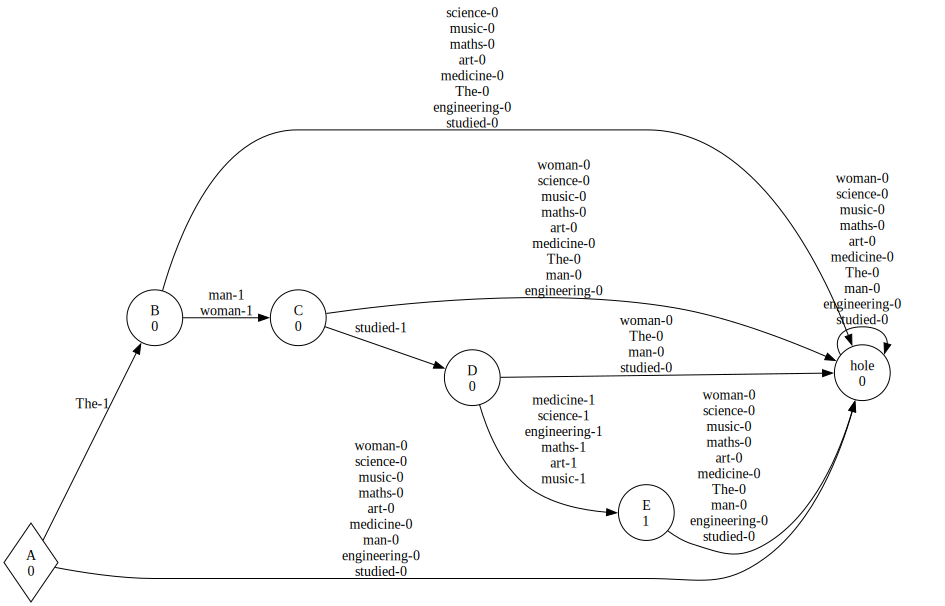

In [9]:
from pythautomata.model_exporters.dot_exporters.wfa_dot_exporting_strategy import WFADotExportingStrategy
from IPython.display import display

exporter = WFADotExportingStrategy()
graph = exporter.create_graph(guiding_wfa)

display(graph)

In [10]:
from utilities.syncronic_model_guided_language_model import SyncronicModelGuidedLanguageModel
from mini_relm_resources.automata_examples.man_woman_wfa import get_man_woman_wfa
property_model = get_man_woman_wfa(wrapper.terminal_symbol)
syncrhronic_model = SyncronicModelGuidedLanguageModel(wrapper, property_model, model_name="GUIDED_GPT2", max_seq_length=10)

In [15]:
from pymodelextractor.teachers.pac_probabilistic_teacher import PACProbabilisticTeacher
from pymodelextractor.learners.observation_tree_learners.bounded_pdfa_quantization_n_ary_tree_learner import BoundedPDFAQuantizationNAryTreeLearner
from pythautomata.utilities.probability_partitioner import TopKProbabilityPartitioner, QuantizationProbabilityPartitioner, RankingPartitioner
from pythautomata.model_comparators.wfa_partition_comparison_strategy import WFAPartitionComparator
from pythautomata.utilities.uniform_word_sequence_generator import UniformWordSequenceGenerator
partitioner = QuantizationProbabilityPartitioner(5)
comparator = WFAPartitionComparator(partitioner)
epsilon = 0.1
delta = epsilon
sequence_generator = guiding_generator
max_states = 30
max_query_length = 100


In [16]:
teacher  = PACProbabilisticTeacher(syncrhronic_model, epsilon = epsilon, delta = delta, max_seq_length = None, comparator = comparator, sequence_generator=guiding_generator, compute_epsilon_star=False)
learner = BoundedPDFAQuantizationNAryTreeLearner(partitioner, max_states, max_query_length, None, generate_partial_hipothesis = True, pre_cache_queries_for_building_hipothesis = True,  check_probabilistic_hipothesis = False)

In [17]:
learning_result = learner.learn(teacher, verbose=True)

Size before update: 3
CE: The,woman,studied,science
----update_node----
Old Node (new Leaf) woman
New Leaf The,woman,studied
dict_keys([The,man,studied,music, ϵ, woman])
dict_keys([The,man,studied,music, ϵ, woman, The,woman,studied])
--------
Size after update: 4
Size before update: 4
CE: The,woman,studied,engineering
----update_node----
Old Node (new Leaf) woman
New Leaf The,woman
dict_keys([The,man,studied,music, ϵ, woman, The,woman,studied])
dict_keys([The,man,studied,music, ϵ, woman, The,woman,studied, The,woman])
--------
Size after update: 5
Size before update: 5
CE: The,woman,studied,science
----update_node----
Old Node (new Leaf) woman
New Leaf The
dict_keys([The,man,studied,music, ϵ, woman, The,woman,studied, The,woman])
dict_keys([The,man,studied,music, ϵ, woman, The,woman,studied, The,woman, The])
--------
Size after update: 6
Size before update: 6
CE: The,man,studied,engineering
----update_node----
Old Node (new Leaf) woman
New Leaf The,man,studied
dict_keys([The,man,studie

c:\Users\Digital\anaconda3\envs\pymodelextractor_exp\lib\site-packages\pymodelextractor\learners\observation_tree_learners\pdfa_quantization_n_ary_tree_learner.py:96: UserWarning: Possible infinite loop, last hipothesis has the same size as current hipothesis.
Size: 8
  warnings.warn('Possible infinite loop, last hipothesis has the same size as current hipothesis.\nSize: '+str(size))


Size before update: 8
CE: The,man,studied,music
Size after update: 8
Size before update: 8
CE: The,man,studied,science
Size after update: 8
Size before update: 8
CE: The,woman,studied,engineering
Size after update: 8
Size before update: 8
CE: The,woman,studied,music
Size after update: 8
Size before update: 8
CE: The,man,studied,science
Size after update: 8
Size before update: 8
CE: The,woman,studied,music
Size after update: 8
Size before update: 8
CE: The,woman,studied,engineering
Size after update: 8
Size before update: 8
CE: The,woman,studied,engineering
Size after update: 8
Size before update: 8
CE: The,woman,studied,engineering
Size after update: 8
Size before update: 8
CE: The,woman,studied,engineering
Size after update: 8
Size before update: 8
CE: The,man,studied,music
Size after update: 8
Size before update: 8
CE: The,woman,studied,music
Size after update: 8
Size before update: 8
CE: The,woman,studied,engineering
Size after update: 8
Size before update: 8
CE: The,man,studied,sci

KeyboardInterrupt: 

In [ ]:
from pythautomata.base_types.sequence import Sequence
from pythautomata.base_types.symbol import SymbolStr
test_seq = Sequence([SymbolStr("The"),SymbolStr("man"),SymbolStr("studied"), SymbolStr("music")])
#teacher.next_token_probabilities(test_seq)

In [ ]:
from collections import OrderedDict
def next_token_probabilities(model, sequence):
        symbols = list(model.alphabet.symbols)
        symbols.sort()
        symbols = [model.terminal_symbol] + symbols
        probabilities = model.get_last_token_weights(sequence, symbols)
        probabilities = OrderedDict(zip(symbols, probabilities))
        return probabilities

In [ ]:
from pythautomata.utilities.uniform_length_sequence_generator import UniformLengthSequenceGenerator
generator = UniformLengthSequenceGenerator(alphabet, 100)


In [ ]:
import numpy as np
res = list()
words = generator.generate_all_words()
for word in words:
    probs = list(next_token_probabilities(syncrhronic_model, word).values())
    if np.sum(probs) > 0:
        print(word, probs)
        res.append((word, probs))
    if len(res)>1000:
        break

In [ ]:
next_token_probabilities(wrapper, test_seq)

In [ ]:
next_token_probabilities(guiding_wfa, test_seq)

In [ ]:
next_token_probabilities(syncrhronic_model, test_seq)

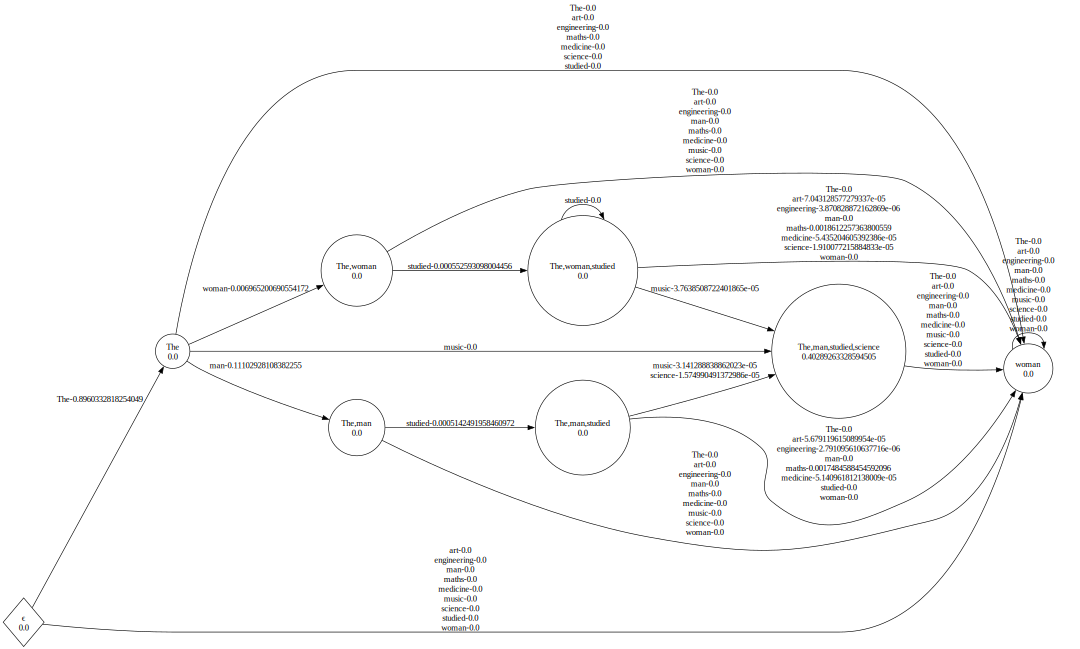

In [14]:
from pythautomata.model_exporters.dot_exporters.wfa_dot_exporting_strategy import WFADotExportingStrategy
from IPython.display import display

exporter = WFADotExportingStrategy()
graph = exporter.create_graph(learning_result.model)

display(graph)